In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, mean_squared_log_error
%matplotlib inline
df = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
pd.set_option('float_format', '{:f}'.format)

# Exploring The Data

In [2]:
df.shape

(21613, 21)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,...,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,...,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,...,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,...,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,...,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312057,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* No missing values to deal with
* Dataset has 21,613 rows and 20 columns 
* ID variable doesn't seem to be very helpful for predicting house prices so I will remove it

In [6]:
df.drop(columns = ['id'], inplace= True)

# Analyzing date of sale vs price

In [7]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [8]:
df['date'] = df['date'].apply(lambda x: x[0:8])
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d') # convert to datetime object to analyze time patterns
recent = df['date'].min()
latest = df['date'].max()
print(recent, latest) #date range of this dataset is around one year starting on May 2nd, 2014 to May 27th, 2015

2014-05-02 00:00:00 2015-05-27 00:00:00


In [9]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [10]:
df['month'] = df["date"].dt.month
df['day'] = df['date'].dt.day

<AxesSubplot:xlabel='date', ylabel='price'>

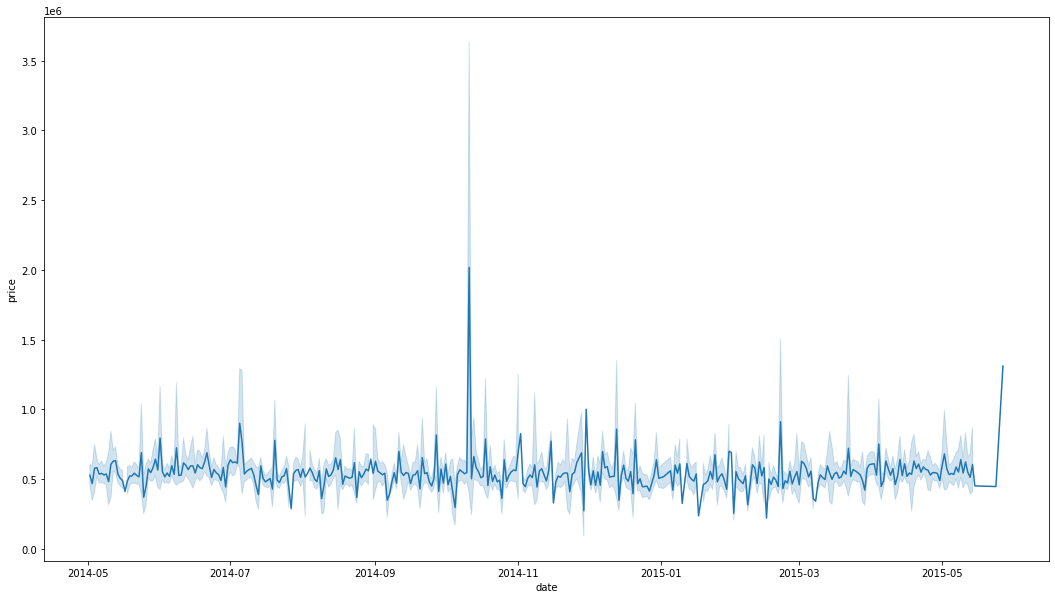

In [11]:
plt.figure(figsize = (18, 10))
sns.lineplot(x = df['date'], y = df['price'])

<AxesSubplot:xlabel='month', ylabel='price'>

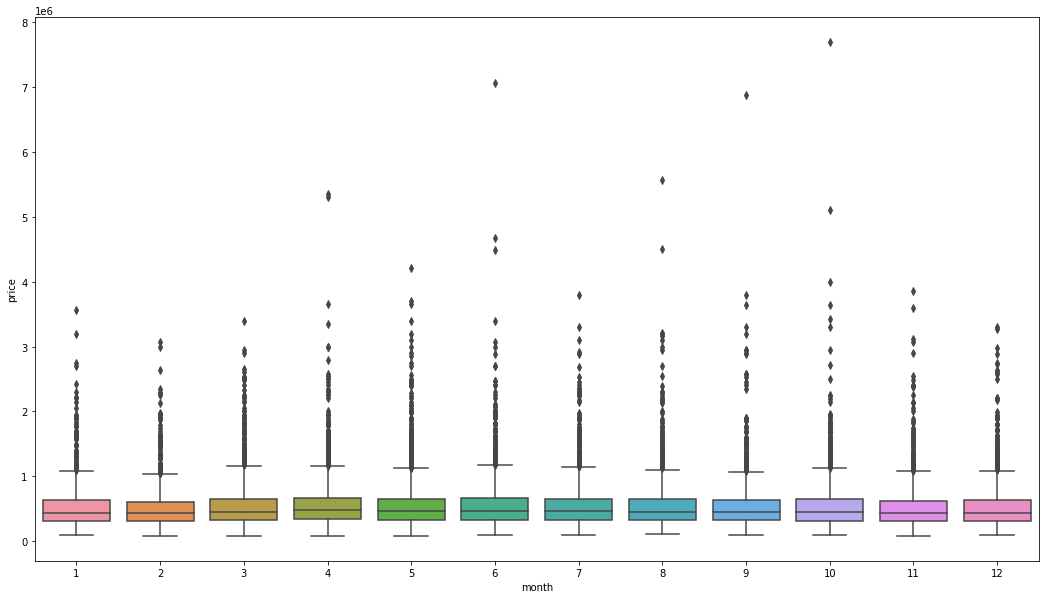

In [12]:
plt.figure(figsize = (18, 10))
sns.boxplot(x = df['month'], y = df['price'])

<AxesSubplot:xlabel='day', ylabel='price'>

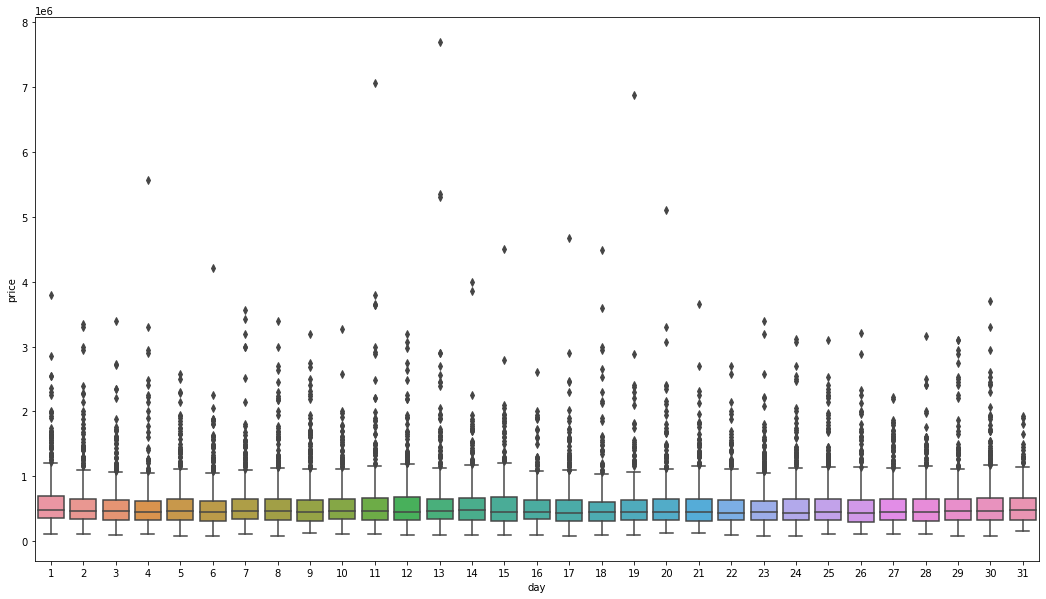

In [13]:
plt.figure(figsize = (18, 10))
sns.boxplot(x = df['day'], y=  df['price'])

Looking at these graphs, we can see that the date of house purchase can't really explain the price of a house, therefore we will remove these columns.

In [14]:
df.drop(columns = ['date', 'day', 'month'], inplace = True)

# Distributions Of Each Variable

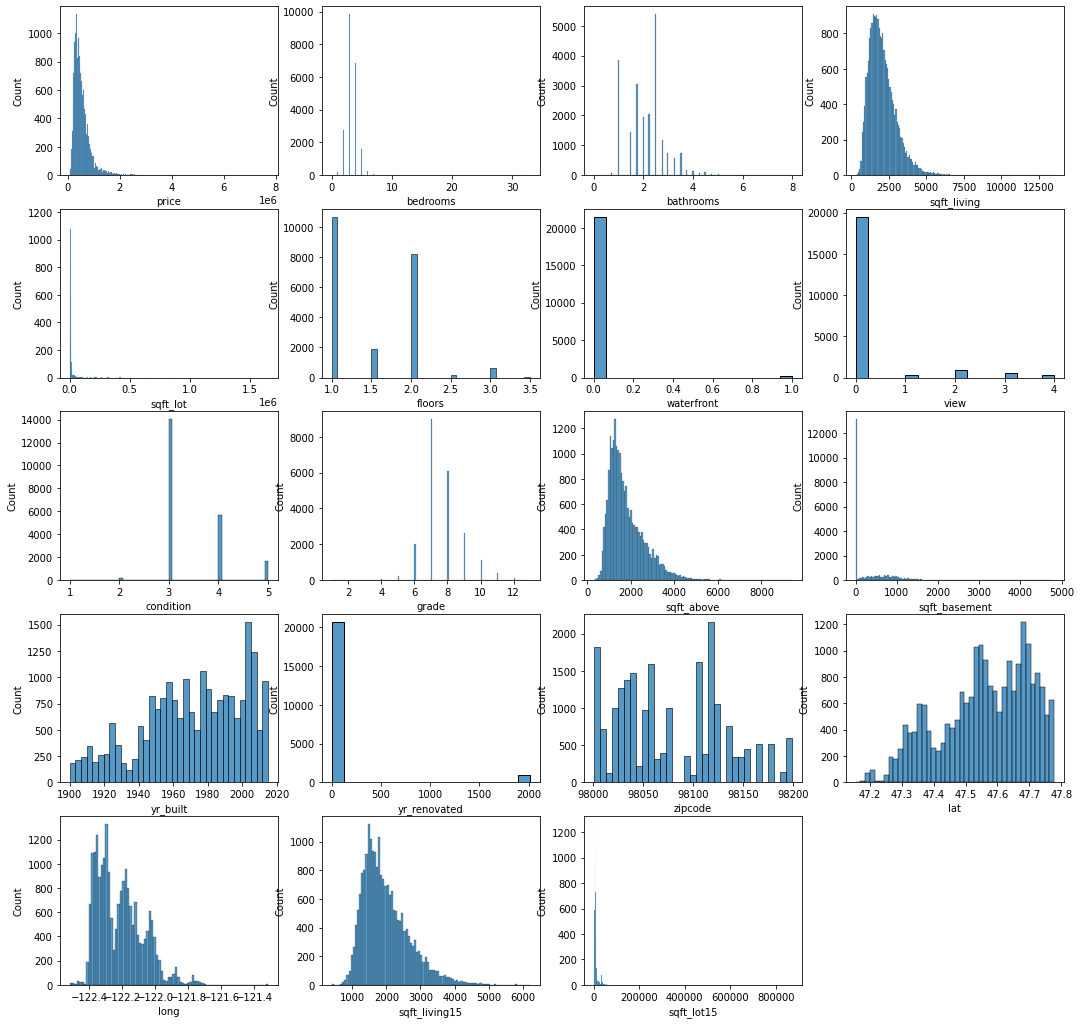

In [15]:
cols = df.columns
fig, ax = plt.subplots(nrows = 5, ncols = 4, figsize = (18, 18))
for i, ax in enumerate(fig.axes):
    if i >= len(cols):
        fig.delaxes(ax)
    else:
        sns.histplot(x = df[cols[i]], ax = ax)

1. Variables like waterfront, view, sqft_basement, yr_renovated have a lot of 0s, and some categorical variables like floors and view are unevenly distributed
    
    a. May affect data visualization and model performance
    
    b. Remove variable if there is no significant difference in price between 0s and non 0s
    
    c. Remove some of the categorical variables if seen necessary later on

2. Numeric variables like price, sqft_living, sqft_above are skewed to the left
    
    a. Removing outliers may fix the distribution
    
    b. Normalizing the distribution may benefit specific models

# Looking into variables w/ a lot of 0s

0.9924582427242863


<AxesSubplot:xlabel='waterfront', ylabel='price'>

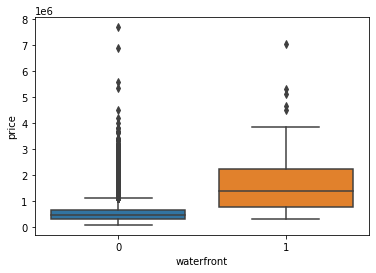

In [16]:
# waterfront
print(len(df[df['waterfront'] == 0]) / len(df['waterfront'])) # percentage of 0s
sns.boxplot(x = df['waterfront'], y = df['price'])

99% of the houses in this dataset are not near waterfronts. The boxplot shows that the difference in price between 0s and 1s is significant enough so we will keep this variable.

0.9017258131680007


<AxesSubplot:xlabel='view', ylabel='price'>

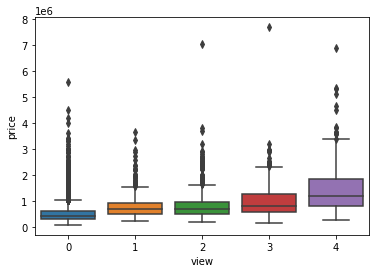

In [17]:
# view
print(len(df[df['view'] == 0]) / len(df['view']))
sns.boxplot(x = df['view'], y = df['price'])

90% of the houses in this dataset have a *view* grade of 0. The boxplot shows that there is as slight increase in price as the view rating increases so we will keep this variable.

In [18]:
print(df[df['sqft_basement'] == 0]['price'].describe())
print('-------------------------')
print(df[df['sqft_basement'] != 0]['price'].describe())

count     13126.000000
mean     486884.090507
std      297509.197424
min       75000.000000
25%      299000.000000
50%      411500.000000
75%      595000.000000
max     4489000.000000
Name: price, dtype: float64
-------------------------
count      8487.000000
mean     622373.563803
std      441829.545603
min      100000.000000
25%      375000.000000
50%      515000.000000
75%      711688.500000
max     7700000.000000
Name: price, dtype: float64


We can also see that the difference in mean between houses w/ and w/out basements is around $140000 which is significant enough to keep this variable.

0.9577106371165502


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

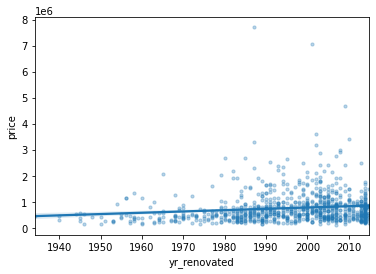

In [19]:
# yr_renovated
print(len(df[df['yr_renovated'] == 0]) / len(df['yr_renovated']))
df2 = df[df['yr_renovated'] != 0]
sns.regplot(x = df2['yr_renovated'], y = df2['price'], scatter_kws = {'alpha': .3, 's': 10})

95% of the houses in this dataset were never renovated, and the regression plot (ignoring houses that haven't been renovated) shows a slightly positive relationship between *price* and *yr_renovated*  

In [20]:
print(df[df['yr_renovated'] == 0]['price'].describe())
print('--------------------------')
print(df[df['yr_renovated'] != 0]['price'].describe())

count     20699.000000
mean     530360.818155
std      349578.014864
min       75000.000000
25%      320000.000000
50%      448000.000000
75%      634400.000000
max     6885000.000000
Name: price, dtype: float64
--------------------------
count       914.000000
mean     760379.029540
std      607734.767361
min      110000.000000
25%      401250.000000
50%      600000.000000
75%      900000.000000
max     7700000.000000
Name: price, dtype: float64


Although the count of houses that have been renovated is way less than the count of houses that haven't (5%:95%), we can still see a slightly higher price mean with houses that have been renovated. 

0.6073196687179012


<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

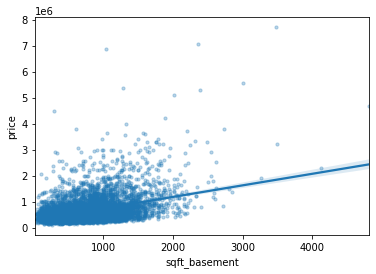

In [21]:
# sqft_basement
print(len(df[df['sqft_basement'] == 0]) / len(df['sqft_basement']))
df2 = df[df['sqft_basement'] != 0]
sns.regplot(x = df2['sqft_basement'], y = df2['price'], scatter_kws = {'alpha': .3, 's': 10})

60% of houses in this dataset do not have basements. The regression plot (ignoring houses with no basements) shows that there is a slightly positive relationship between *sqft_basement* and *price*. There are a couple outliers that are way off the other datapoints and the reg line which may affect our model performance later on, so I will remove those. 

In [22]:
df2[df2['price'] > 7000000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,7062500.000000,5,4.500000,10040,37325,2.000000,1,2,3,11,7680,2360,1940,2001,98004,47.650000,-122.214000,3930,25449
7252,7700000.000000,6,8.000000,12050,27600,2.500000,0,3,4,13,8570,3480,1910,1987,98102,47.629800,-122.323000,3940,8800


In [23]:
# dropping outliers
df.drop([3914, 7252], inplace = True)

# Bivariate analysis between independent and dependent variables

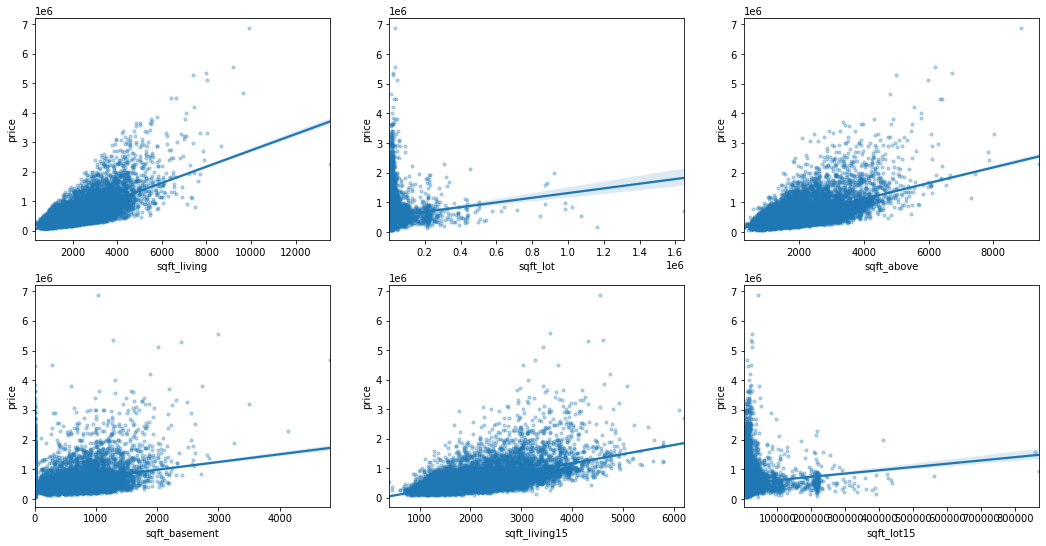

In [24]:
df.columns
num = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 9))
for i, ax in enumerate(fig.axes):
    if i >= len(num):
        fig.delaxes(ax)
    else:
        sns.regplot(x = df[num[i]], y = df['price'], scatter_kws = {'alpha': .3, 's': 10}, ax = ax)

Most numerical variables seem to be well linearly correlated with *price*. Big outlier in *sqft_living*, will drop this. *sqft_lot* and *sqft_lot15* do not look like good predictor variables as the data doesn't seem consistent enough with *price*, therefore I will drop these variables. 

In [25]:
df.drop(columns = ['sqft_lot', 'sqft_lot15'], inplace = True)

In [26]:
df[df['sqft_living'] > 12000]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
12777,2280000.000000,7,8.000000,13540,3.000000,0,4,3,12,9410,4130,1999,0,98053,47.667500,-121.986000,4850


In [27]:
df.drop([12777], inplace = True)

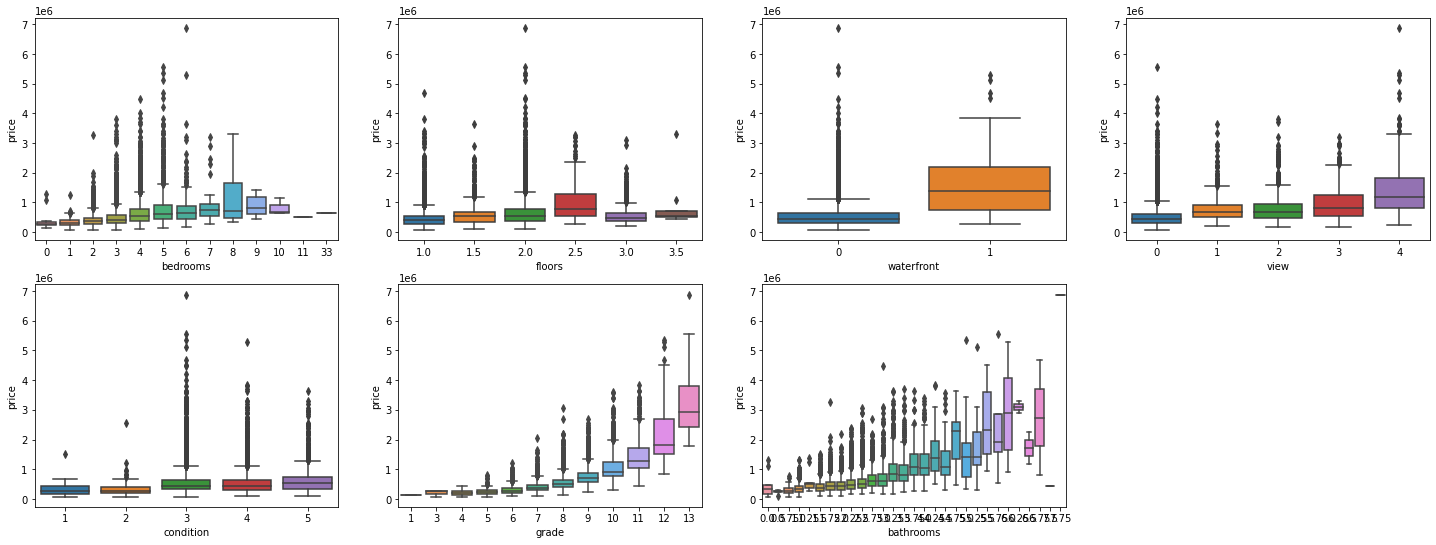

In [28]:
df.columns
categorical = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'bathrooms']
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (25, 9))
for i, ax in enumerate(fig.axes):
    if i >= len(categorical):
        fig.delaxes(ax)
    else:
        sns.boxplot(x = df[categorical[i]], y = df['price'], ax = ax)

Most categorical variables seem to be linearly correlated with *price*. Outlier in *bedrooms* where a house has 33 bedrooms.*floors* sees an increase in price until it reaches 3 floors where it unusally drops. We saw in univariate analysis that *floors* was not distributed well, which may have caused the unusual drop in price, therefore I will drop this column. I will also drop the outlier in *bedrooms*.

In [29]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
15870,640000.000000,33,1.750000,1620,1.000000,0,0,5,7,1040,580,1947,0,98103,47.687800,-122.331000,1330


In [30]:
# drop bedroom outlier
df.drop([15870], inplace = True)

In [31]:
df.drop(columns = ['floors'], inplace = True)

# Normalizing distribution of numeric variables

To normalize *price*, *sqft_above*, and *sqft_living*, I will remove some outliers and use log transformation.

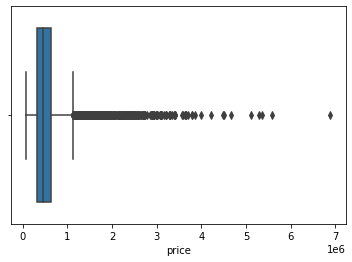

In [32]:
sns.boxplot(x = df['price'])
df[df['price'] > 4000000].index
temp = df.drop([1164, 1315, 1448, 2626, 4411, 8092, 8638, 9254, 12370])
df['price'] = np.log2(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

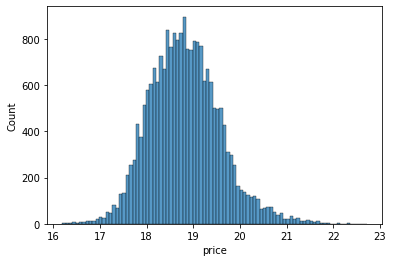

In [33]:
sns.histplot(x = df['price'])

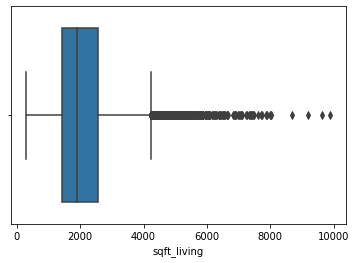

In [34]:
sns.boxplot(x = df['sqft_living'])
df['sqft_living'] = np.log2(df['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

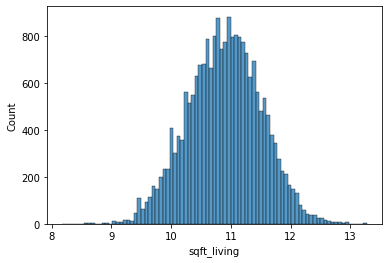

In [35]:
sns.histplot(x = df['sqft_living'])

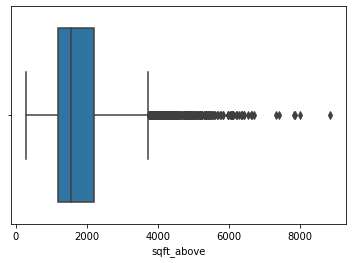

In [36]:
sns.boxplot(x = df['sqft_above'])
df[df['sqft_above'] > 8000]
df.drop([18302], inplace = True)
df['sqft_above'] = np.log2(df['sqft_above'])

<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

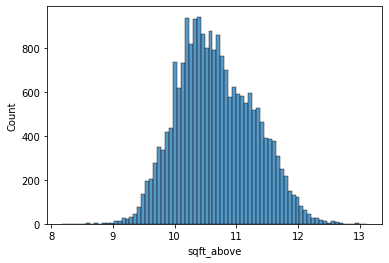

In [37]:
sns.histplot(x = df['sqft_above'])

# Model Testing

In [38]:
from sklearn.metrics import r2_score
X = df.drop(columns = ['price'])
y = df['price']
models = ['Linear', 'Ridge', 'Lasso', 'RandomForest', 'XGBoost']
final = []

In [39]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = LinearRegression().fit(X_train, y_train)
    pred = mod.predict(X_test)
    scores.append(r2_score(pred, y_test))
final.append(np.mean(scores))

In [40]:
# Ridge Regression
from sklearn import linear_model
kf = KFold(n_splits = 10)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = linear_model.Ridge(alpha = 2).fit(X_train, y_train)
    pred = mod.predict(X_test)
    scores.append(r2_score(pred, y_test))
final.append(np.mean(scores))

In [41]:
#Lasso Regression
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits = 10)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = linear_model.Lasso().fit(X_train, y_train)
    pred = mod.predict(X_test)
    scores.append(r2_score(pred, y_test))
final.append(np.mean(scores))

In [42]:
# Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits = 10)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = RandomForestRegressor().fit(X_train, y_train)
    pred = mod.predict(X_test)
    scores.append(r2_score(pred, y_test))
final.append(np.mean(scores))

In [43]:
# XGBoost
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
kf = KFold(n_splits = 10)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = XGBRegressor().fit(X_train, y_train)
    pred = mod.predict(X_test)
    scores.append(r2_score(pred, y_test))
final.append(np.mean(scores))

<AxesSubplot:xlabel='R2 Score', ylabel='Model'>

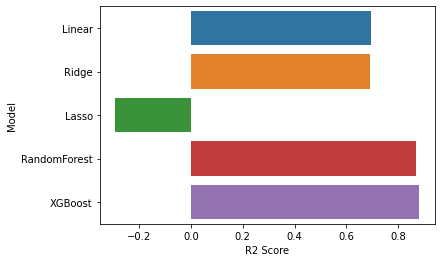

In [44]:
data = {'Model': models, 'R2 Score': final}
df2 = pd.DataFrame(data)
sns.barplot(x = df2['R2 Score'], y = df2['Model'], orient = 'h')

XGBoost (without any parameter changes) seems to be the best model with an R2 score of .88, so I will optimize its parameters using GridSearch to get the best R2 score

In [45]:
from sklearn.model_selection import GridSearchCV
mod = XGBRegressor(n_jobs = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
params = {'n_estimators': [100, 250, 500, 750], 'max_depth': [3, 5, 7, 9], 'learning_rate' : [.1, .3, .5, .7]}
grid = GridSearchCV(mod, scoring = 'r2', cv = 10, param_grid = params, n_jobs = 5)
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=5,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [46]:
print(grid.best_score_)

0.8989557985188673


With GridSearch, my final R2 score was around .89